### 확률플롯의 활용

1. 특정 분포의 cdf와 표본 자료의 cdf가 유사하다면, 표본은 그 분포를 따르지 않을까?
   > : P-P plot(probability-probability plot), 개별 값에 해당하는 면적을 비교
2. 특정 분포의 분위수와 표본 자료의 분위수가 유사하다면, 그 표본은 그 분포를 따르지 않을까?
   > : Q-Q plot(quantile-quantile plot), 면적에 해당하는 개별 값을 비교

`-` 정규확률 플롯 : 사전 자료의 그룹화가 필요치 않고, 작은 크기의 표본에도 적용 가능하다. (CLT)

* 확률모형(확률분포함수 pdf)이란?

> 이산변수는 막대그래프로, 연속변수는 면적으로 표현

* 확률플롯의 이용

> 시뮬레이션에서 나온 자료가 특정 분포를 따르는지
>
> 회귀분석에서 오차항이 정규분포를 따르는지(잔차분석)
>
> 소표본에서 모평균을 검정할 때 표본자료가 정규분포를 따르는지

`-` $\chi^2 - test$

표본을 통해 히스토그램을 그리고, 각 구간별 관측된 도수와 모집단의 분포로 예상되는 기대도수를 비교하여 검정한다.

> $\chi^2$ 적합도 검정
>
> $$T = \Sigma\frac{O_i - E_i}{E_i} \sim \chi^2(k-c-1)$$
>
> k는 구간의 수, c는 추정된 모수의 개수(표본으로 추정한 모수가 몇개인지)
> 
> 해당 검정통계량이 작을수록 귀무가설(해당 분포를 따른다)을 기각하기 어려움.

ex) 이산균등분포

> 주사위를 1000번 굴렸을 때 각 눈금이 나온 수의 분포

|눈금|1|2|3|4|5|6|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$O_i$|150|160|165|155|170|200|
|$E_i$|166.67|166.67|166.67|166.67|166.67|166.67|

> 검정통계량은 자유도가 5인 카이제곱분포를 따름. $\chi^2 = 9.47$

In [9]:
qchisq(0.95, 5)

[1] 11.0705

> 따라서 귀무가설을 기각할 수 없고(이산균등분포를 따름), 주사위는 공정하다.

ex2) 이항분포와의 비교

|남아의 수|0|1|2|3|
|:-:|:-:|:-:|:-:|:-:|
|$O_i$|100|350|400|150|
|$E_i$|125|375|375|125|

1000가구 대상으로 p = 0.5인지

In [45]:
for (i in 0:3) {
    print(dbinom(i, 3, 0.5))
}

[1] 0.125
[1] 0.375
[1] 0.375
[1] 0.125


In [5]:
(100-125)^2/125 + (350-375)^2/375 + (400-375)^2/375 + (150 - 125)^2/125

[1] 13.33333

In [7]:
qchisq(0.95, 3)

[1] 7.814728

> 기각되어 0.5라고 할 수 없다.

ex3) 포아송분포와의 비교

|사망자의 수|0|1|2|3|4+|total|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$O_i$|109|25|22|3|1|200|

> 모수 $\lambda$가 주어지지 않았으므로 추정

In [27]:
lambda = (65+22*2+3*3+1*4)/200
lambda

[1] 0.61

$$\frac{\lambda^x e^{-\lambda}}{x!}$$

In [15]:
dpois(0, 0.61) * 200

[1] 108.6702

In [16]:
dpois(1, 0.61) * 200

[1] 66.28881

In [17]:
dpois(2, 0.61) * 200

[1] 20.21809

In [18]:
dpois(3, 0.61) * 200

[1] 4.111011

In [20]:
(1 - ppois(3, 0.61)) * 200

[1] 0.7119235

|사망자의 수|0|1|2|3|4+|total|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$O_i$|109|62|22|3|1|200|
|$E_i$|108.7|66.3|20.2|4.1|0.7|200|

$\chi^2 = \Sigma \frac{(O_i-E_i)^2}{E_i} = $

In [30]:
chi = (109 - 108.7)^2/108.7 + (62 - 66.3)^2/66.3 + (22 - 20.2)^2/20.3 + (3 - 4.1)^2/4.1 + (1 - 0.7)^2/0.7
chi

[1] 0.8630111

In [29]:
qchisq(0.95, 5-1-1)

[1] 7.814728

In [37]:
pchisq(chi, 5-1-1, lower.tail = FALSE)  ## p-value가 매우 낮게 나옴

[1] 0.8343436

* $\chi^2 -$ 적합도 검정은 모든 셀의 기대빈돗수가 5이상이여야 근사된다.

* 기대빈도수 5미만의 셀이 전체의 20%보다 적으면 적용 가능

* 20%가 넘는다면 이웃의 셀과 합쳐 기대빈도수를 계산하여 이용

* 합칠 수 없으면 exact test를 권장함

`-` 연속형의 경우

P-P plot

$(\frac{i - 0.5}{n}, F(x_{(i)}))$의 산점도에 해당함. (Hazen Methods)

* $\frac{i - 0.5}{n}$ : 표본자료에서 i번째 자료 이전까지 나올 확률. n = 100이면 0.5, 1.5, 2.5, ... , 99.5
* $F(x_{(i)})$ : 표본자료를 순서통계량으로 나타냈을 때 해당 값의 정규분포에서의 누적비율.

> 각 값의 범위가 [0,1]임

Q-Q plot

$(x_{(i)}, F^{-1}(\frac{i - 0.5}{n}))$

* $x_{(i)}$ : 표본자료에서 i번째 자료의 값. 순서통계량
* $F^{-1}(\frac{i - 0.5}{n})$

> 각 값의 범위는 무한

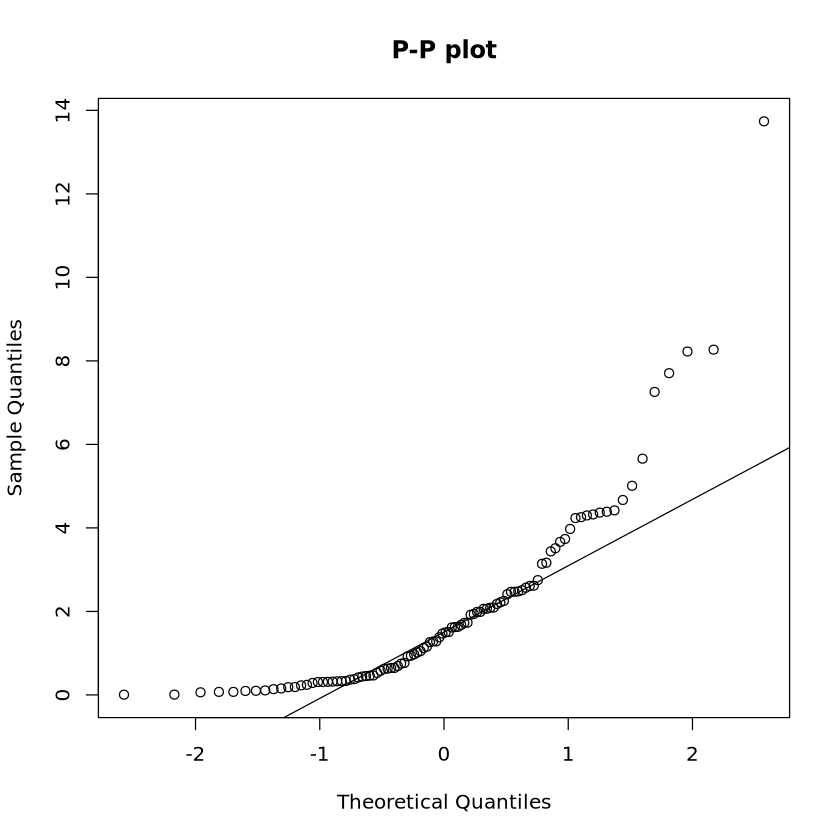

In [49]:
x <- rexp(100, 0.5)  ## 평균이 2인 지수분포
qqnorm(x, main = "P-P plot")  ## qqplot
qqline(x)

In [51]:
install.packages("nortest")
library(nortest)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [52]:
ad.test(x)


	Anderson-Darling normality test

data:  x
A = 5.3526, p-value = 2.649e-13


> 귀무가설을 기각. 즉, 정규분포를 따르지 않음.

`-` 정규확률플롯 작성단계

(1) 순서통계량을 구함 : $x_{(1)}, \dots, x_{(n)}$

(2) 표본에서 $p_i$의 분위수 $x_{(i)}$ 계산 : $p_i = \frac{i - 0.5}{n}$

(3) $N(\mu, \sigma^2)$에서 $p_i$에 해당하는 $x$값 계산

> $P(X < x_i) = p_i \to z = \Psi^{-1}(p_i)$

(4) $(x_{(i)}, z)$를 그림. 직선이면 표본자료는 정규분포를 따름.

> sorting을 함 $\to$ 각 순서통계량의 분위수를 구함 $\to$ 해당 분위수를 표준정규분포의 누적분포함수의 역함수에 넣음(qnorm(p_i))

In [ ]:
darvin <- c(49, -67, 8, 16, 6, 23, 28, 41, 14, 29, 56, 24, 75, 60, -48)
p <- (1:length(darvin) - 0.5)/length(darvin)
z <- qnorm(p)